## Quantum Circuits on both Simulators and IBM Quantum Computer

In this notebook, we are going to learn how to use Qiskit to define a simple circuit and to execute it on both simulators and the quantum computers of the IBM Quantum Experience.. 

We start by importing the necessary packages.

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
from qiskit.quantum_info import Statevector

## Defining the circuit

We are going to define a very simple circuit: we will use the $H$ gate to put a qubit in superposition and then we will measure it

C:\Users\M2\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


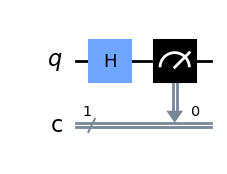

In [2]:
# Let's create a circuit to put a state in superposition and measure it

circ = QuantumCircuit(1,1) # We use one qubit and also one classical bit for the measure result 

circ.h(0) #We apply the H gate

circ.measure(range(1),range(1)) # We measure

circ.draw(output='mpl') #We draw the circuit

## Running the circuit on simulators

Once that we have defined the circuit, we can execute it on a simulator. 

{'1': 534, '0': 490}


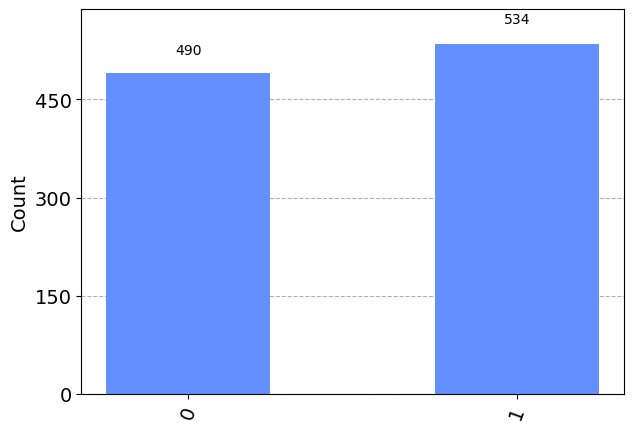

In [3]:
# Executing on the local simulator

backend_sim = Aer.get_backend('qasm_simulator') # We choose the backend

job_sim = execute(circ, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)



We can also run the circuit run the circuit with a simulator that computes the final state. For that, we need to create a circuit with no measures 

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


C:\Users\M2\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


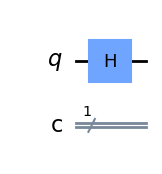

In [4]:
# Execution to the get the statevector

circ2 = QuantumCircuit(1,1)

circ2.h(0)

backend = Aer.get_backend('statevector_simulator') # We change the backend

job = execute(circ2, backend) # We execute the circuit with the new simulator. Now, we do not need repetitions

result = job.result() # We collect the results and access the stavector 
outputstate = result.get_statevector(circ2)
print(outputstate)
circ2.draw(output='mpl')

Finally, we can also obtain the unitary matrix that represents the action of the circuit

In [5]:
backend = Aer.get_backend('unitary_simulator') # We change the backend again

job = execute(circ2, backend) # We execute the circuit

result = job.result() # We collect the results and obtain the matrix
unitary = result.get_unitary()
print(unitary)


Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


## Running the circuit on Quantum Computer

Now, we are going to use the quantum computers at the IBM Quantum Experience to use our circuit 

One you have created an IBMid account here: https://quantum-computing.ibm.com/

...in the below code, you will need to replace MY API TOKEN with the API number you have save into your clipboard.
Alternatively, you can load the account (if you have saved the Token in a file).

For more details, you can read here: https://github.com/Qiskit/qiskit-ibmq-provider

In [6]:
# Connecting to the real quantum computers
provider = IBMQ.enable_account('13c9a317d02a3260df3ca23dc0cde8f80f64f69a36645295cb9e8198d4e0d732f2c4439f0f9e0a9d07e3018f34a0bd378b8a73584b4e2e8ed9222b546475871e')
provider.backends() # We retrieve the backends to check their status

for b in provider.backends():
    print(b.status().to_dict())

C:\Users\M2\AppData\Local\Temp\ipykernel_9412\1398748422.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  provider = IBMQ.enable_account('13c9a317d02a3260df3ca23dc0cde8f80f64f69a36645295cb9e8198d4e0d732f2c4439f0f9e0a9d07e3018f34a0bd378b8a73584b4e2e8ed9222b546475871e')
C:\Users\M2\AppData\Local\Temp\ipykernel_9412\1398748422.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMPr

{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_statevector', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_mps', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_extended_stabilizer', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_stabilizer', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'ibm_brisbane', 'backend_version': '1.1.16', 'operational': True, 'pending_jobs': 96, 'status_msg': 'internal'}
{'backend_name': 'ibm_kyoto', 'backend_version': '1.2.13', 'operational': True, 'pending_jobs': 21, 'status_msg': 'active'}
{'backend_name': 'ibm_osaka', 'backend_version': '1.0.8', 'operational

We can execute the circuit on IBM's quantum simulator (supports up to 32 qubits). We only need to select the appropriate backend.

{'0': 515, '1': 509}


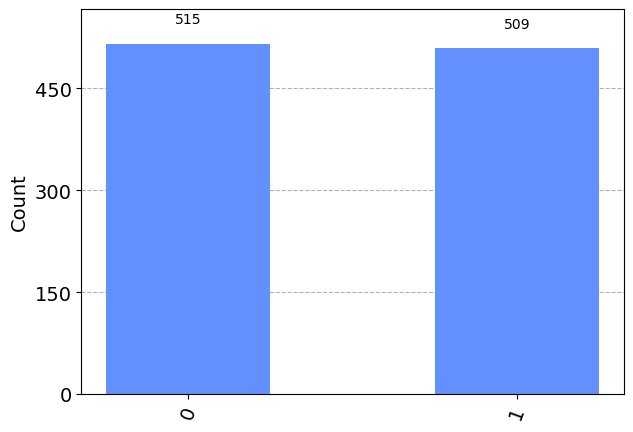

In [7]:
# Executing on the IBM Q Experience simulator

backend_sim = provider.get_backend('ibmq_qasm_simulator') # We choose the backend

job_sim = execute(circ, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)

To execute on one of the real quantum computers, we only need to select it as backend. We will use *job_monitor* to have live information on the job status 

In [ ]:
# Executing on the quantum computer

backend = provider.get_backend('ibm_brisbane')

job_exp = execute(circ, backend=backend)
job_monitor(job_exp)

Job Status: job is queued (None)

When the job is done, we can collect the results and compare them to the ones obtaine with the simulator

In [ ]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

And since IBM Brisbane took 3 hours in queue to process the circuit, I retrieved the job later. Here is the result for the circuit on the Actual Quantum Device. Unfortunately trying to plot the historgram for the device side by side with the simulator causes problems. 

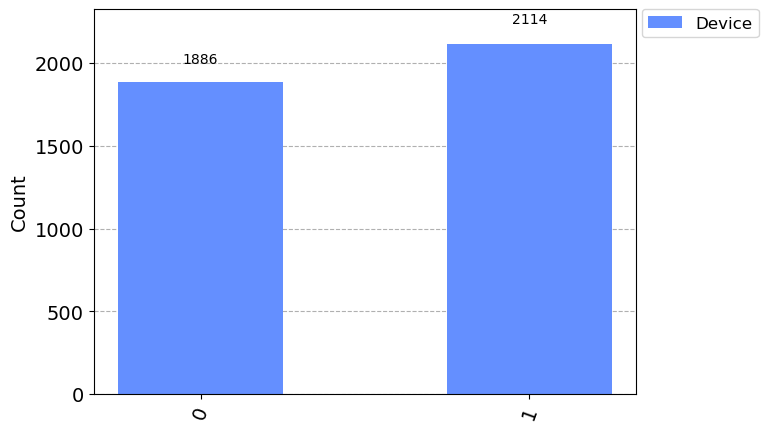

In [44]:
# Get the job by ID
job_id = 'cpc9yzbja3gg0080w5k0'
provider = IBMQ.get_provider()
backend = provider.get_backend('ibm_brisbane')

# Retrieve the job using its ID
job_exp = backend.retrieve_job(job_id)

# Retrieve the result and counts
result_exp = job_exp.result()
counts_exp = result_exp.get_counts()
plot_histogram(counts_exp, legend=['Device'])

## EXERCISE TO DO

Based on the above notebook, execute both in a simulator and an IBM Quantum Computer the following circuit:

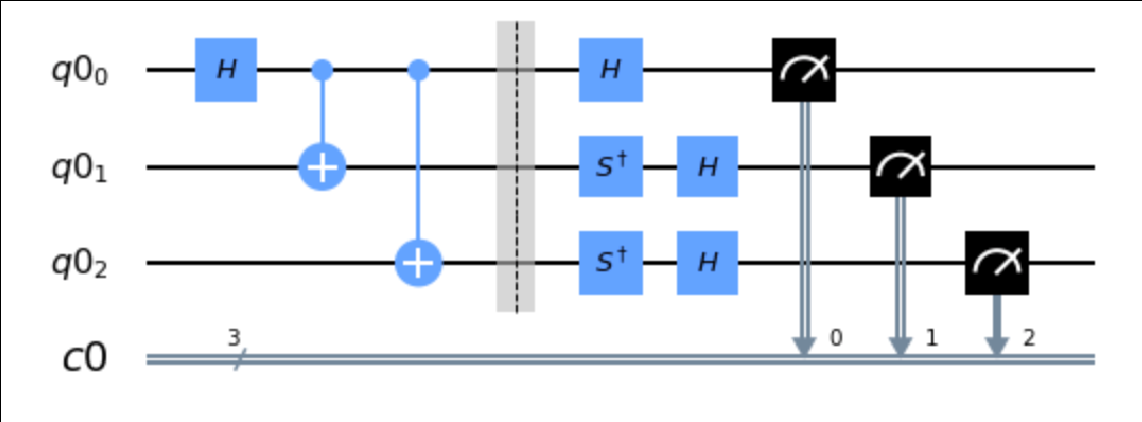

Comment on the final result (state) and provide your interpretation what this quantum circuit is doing.


In [1]:
# Import the necessary libraries
from qiskit import QuantumCircuit, Aer, IBMQ, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit import QuantumRegister, ClassicalRegister
from matplotlib import pyplot as plt

# Load your IBM Quantum account (if not already loaded)
#IBMQ.enable_account('d12994d31946f35c4797572f4778a2baa5150cfc30fa385c36cb2fd830be5b0f004cf55f4000494ddbcaf6fc8c7f21177d083882526f8ee224599ad10b168993')

C:\Users\M2\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


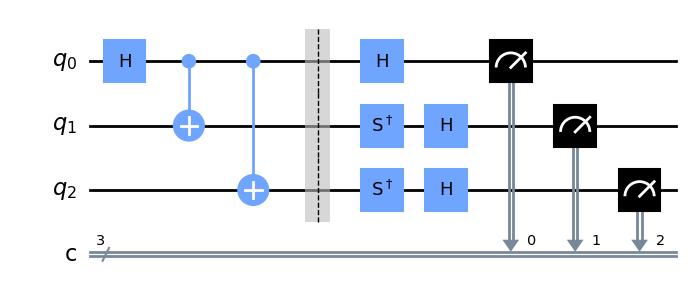

In [2]:

# Create the quantum and classical registers
q = QuantumRegister(3, "q")
c = ClassicalRegister(3, "c")

# Initialize the quantum circuit
circuit = QuantumCircuit(q, c)

# Apply Hadamard gate to qubit q0
circuit.h(q[0])

# Apply controlled-Z gate between qubits 0 and 1
circuit.cx(q[0], q[1])

# Apply controlled-Z gate between qubits 0 and 2
circuit.cx(q[0], q[2])

#separating line - change in quantum ops here?
circuit.barrier()

# Apply Hadamard gate to qubit q0
circuit.h(q[0])

# Apply S Dagger gate to qubit q1
circuit.sdg(q[1])

# Apply Hadamard gate to qubit q1
circuit.h(q[1])

# Apply S Dagger gate to qubit q2
circuit.sdg(q[2])

# Apply Hadamard gate to qubit q2
circuit.h(q[2])

# Measure all qubits
circuit.measure(q, c)

circuit.draw(output='mpl')

Simulator Results: {'111': 252, '010': 262, '100': 229, '001': 281}


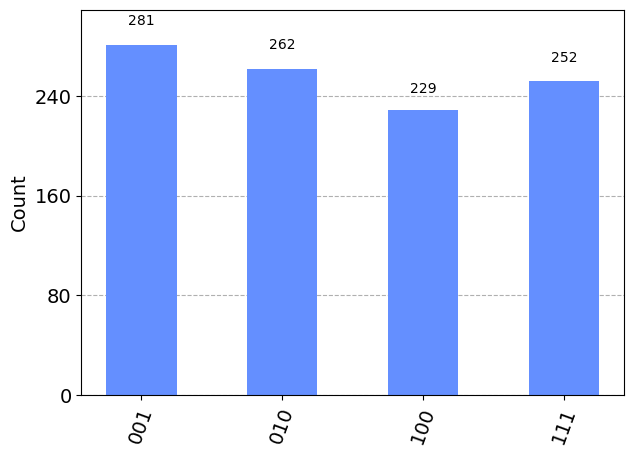

In [4]:
# Compile and execute on the simulator
simulator_backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, simulator_backend)
simulator_result = simulator_backend.run(transpiled_circuit, shots=1024).result()
simulator_counts = simulator_result.get_counts()

# Print and plot the results from the simulator
print("Simulator Results:", simulator_counts)
plot_histogram(simulator_counts)

C:\Users\M2\AppData\Local\Temp\ipykernel_6000\319303619.py:16: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  quantum_computer_result = quantum_computer_backend.run(quantum_computer_job).result()


Quantum Computer Results: {'000': 13, '110': 22, '111': 225, '001': 247, '101': 15, '010': 248, '100': 249, '011': 5}


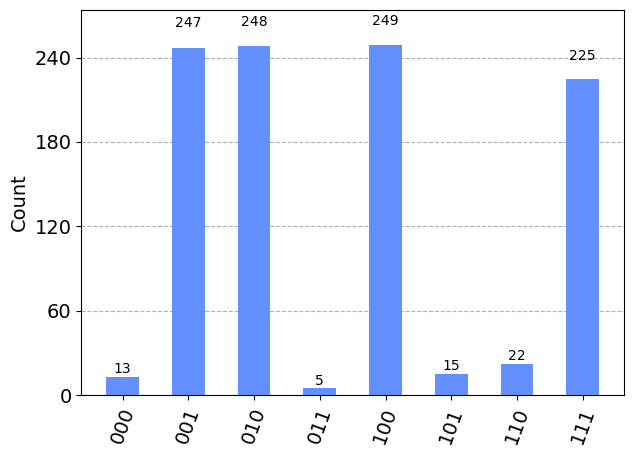

In [9]:
from qiskit import IBMQ, transpile, assemble
from qiskit.visualization import plot_histogram

# Load your IBM Quantum account
IBMQ.enable_account('d12994d31946f35c4797572f4778a2baa5150cfc30fa385c36cb2fd830be5b0f004cf55f4000494ddbcaf6fc8c7f21177d083882526f8ee224599ad10b168993')

# Choose an available backend
provider = IBMQ.get_provider()
quantum_computer_backend = provider.get_backend('ibm_osaka')  # Replace with an available backend

# Transpile and assemble the circuit for the chosen quantum computer backend
compiled_circuit = transpile(circuit, backend=quantum_computer_backend)
quantum_computer_job = assemble(compiled_circuit, backend=quantum_computer_backend)

# Execute the job on the quantum computer
quantum_computer_result = quantum_computer_backend.run(quantum_computer_job).result()
quantum_computer_counts = quantum_computer_result.get_counts()

# Print and plot the results from the quantum computer
print("Quantum Computer Results:", quantum_computer_counts)
plot_histogram(quantum_computer_counts)

Circuit Description:
==
The quantum circuit here has a series of Hadamard gates (H), controlled-Z gates (CX), and measurements for a three-qubit quantum system. Essentially we can describe the  circuit as follows:

The initial state is a quantum superposition of all possible three-qubit states, achieved by applying Hadamard gates (H) to each qubit.
Controlled-Z gates (CZ) are then applied to create entanglement between qubits: a CZ gate between qubits 0 and 1, and another CZ gate between qubits 0 and 2.
The circuit then introduces a separation using a dotted gray line, indicating a change in quantum operations.
Another Hadamard gate (H) is applied to qubit 0, followed by S gates (transposed, as indicated by the Christ symbol) on qubits 1 and 2.
Further Hadamard gates are applied to qubits 1 and 2.
The final state is measured on all three qubits.

Interpretation:
==
The initial Hadamard gates create a superposition of all possible three-qubit states.
The entanglement introduced by Controlled-Z gates leads to correlations between the qubits.
The separation with the dotted gray line indicates a distinct quantum operation.
The subsequent Hadamard gates and S gates perform additional manipulations on the quantum state.
The final measurement collapses the quantum state, yielding specific outcomes for each qubit.

Final Results (State):
==
Simulator Results: The simulator results indicate the distribution of possible outcomes in a simulated quantum environment. The most probable results are '111', '010', '100', and '001'.
Quantum Computer Results: The results obtained from a real quantum computer exhibit variations due to noise and other quantum effects. The most probable outcomes are '111', '001', '010', and '100'.

Overall Interpretation:
==
The quantum circuit appears to be designed to create entanglement and manipulate the quantum state through a combination of Hadamard and S gates. The final measurements provide a glimpse into the probabilistic nature of quantum systems, where specific outcomes are obtained with certain probabilities. The differences between the simulator and quantum computer results highlight the impact of real-world quantum noise and imperfections.
